<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/01_DataScienceUsingPython/blob/main/07_LinearRegression_AdvancedModelingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Linear Regression - Advanced Modeling Techniques

In this course, we will learn how to better apply a linear regression model. First, we will understand how we can prepare our dataset to be fitted to a given model. Some transformations can be very import so that our model may show a better performance.

Then, we will learn how to use linear regression with two different libraries: sklearn and statsmodels. While the regression result is very similar, each library provides different methods for the linear regression model. 

Finally, we will learn some advanced modeling techniques, and understand how to make predictions, how to interpret the estimated coefficients, and how to make graphical analyses from our results.

To that end, we will use a dataset from the housing market. Let's import it:

In [58]:
import pandas as pd

dataset = pd.read_csv('dataset.csv', sep = ';')
dataset.head( )

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


Thus, our dataset has 4 columns, which store the value of each house, its area, its distance from the beach, and its distance from the closest drugstore. 

## Preliminary analyses

Let's start understanding our dataset a little bit more through some preliminary analyses. Thus, let's check the number of entries, and if there are null values.

In [59]:
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


We have 5000 entries in our dataset, and there are no null values.

Now, let's use describe( ) to understand more about each feature.

In [60]:
dataset.describe( )

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


We can see that our features are very different. For instance, while the maximum value is $2.5 \times 10^7$, the maximum distance from a drugstore is approximately 1 km. 

Another aspect we can see is that the mean for 'Valor', 'Area' and 'Dist_Praia' is higher than the median, which might mean that the distribution is right-skewed. 

Finally, in a first glance, by looking at the maximum and minimum values, it seems that there is no strange outlier. All values seem to be correct (for instance, we can see how a house may have an area of $2000$ m$^2$, or how a house may cost R\$ $2.5 \times 10^7$). It might be interesting to remove some extreme values, but this will not be performed here.

Let's draw a correlation matrix:

In [61]:
dataset.corr( )

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


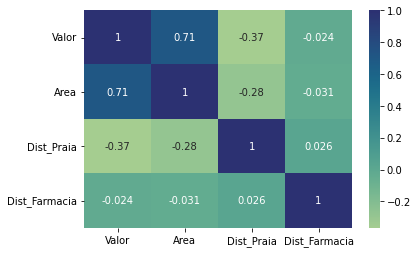

In [62]:
import seaborn as sns

sns.heatmap(dataset.corr( ), annot = True, cmap = 'crest')

There is a strong correlation between the area and the value. Also, we see a rather strong negative correlation between the distance to the beach and the value.

There correlation between the distance to the drugstore and the value is very low, but it is also negative.

Also, there is a very low correlation between the explicative variables.

# Behavior of the dependent variable

Now, let's study the behavior of the dependent variable. We will see how it is distributed, and how it is correlated to the explicative features.

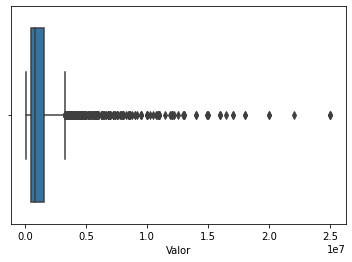

In [63]:
ax = sns.boxplot(x = 'Valor', data = dataset)

Note that the boxplot for the housing prices shows a very right-skewed behavior. However, this is a common behavior for this type of variable: we can't have negative prices, but it is not that unusual to see very expensive houses.

Now, let's see the frequency distribution for this variable using a histogram.

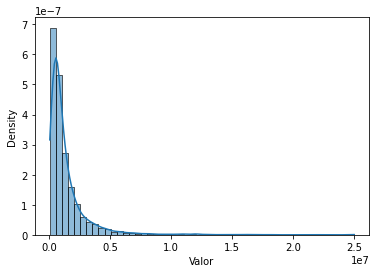

In [64]:
ax = sns.histplot(x = 'Valor', data = dataset, bins = 50, stat = 'density', kde = True)

Again, we see that the distribution for housing prices is very right-skewed. Looking at the histogram, the distribution looks a lot like an exponential distribution.

However, note that many of our statistical tests and methods assume that the distribution of data follows a Normal. In that case, we can use transformations to make it so that our data shows a distribution closer to the Normal.

Finally, let's see how the explicative variables are related to the dependent variables. Thus, we will use a pairplot:

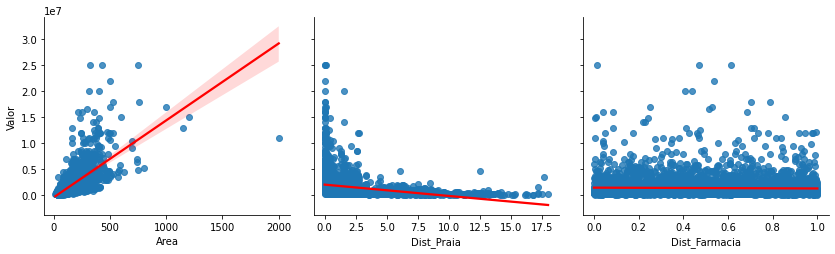

In [65]:
ax = sns.pairplot(dataset, y_vars = ['Valor'], x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.figure.set_size_inches(12, 4)

We see that, as the area increases, the housing prices tend to increase. The opposite behavior is seen when we analyze the distance to the beach. The third feature, however, seems to present a very low influence in the housing prices.

However, note that the features does not seem to present a linear association with the data. For instance, the scatter plot for the distance to the beach seems to present a descending exponential relation. Again, we can perform some transformations to make the association closer to a line.

# Transformation of our features

Now, let's perform transformations in our features. Most statistics assume that the distribution of our target feature follows a Normal and, as such, we should try to make it so that our response follows a Normal distribution (symmetric bell-shaped curve).

This transformation is performed using the Numpy library:



In [66]:
import numpy as np

Now, how should we perform our transformation? Let's look again to how our target is distributed:

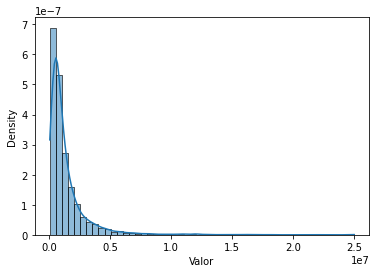

In [67]:
ax = sns.histplot(x = 'Valor', data = dataset, bins = 50, stat = 'density', kde = True)

We said that this distribution looks a lot like a Exponential distribution, where there are higher frequencies in lower prices.

Now, let's look how a negative logarithm function behaves:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


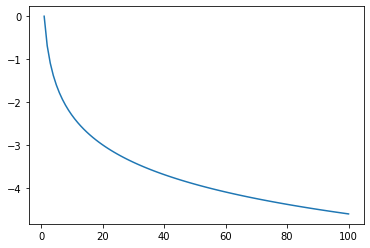

In [68]:
x = np.linspace(1, 100, num = 101)
y = -np.log(x)

sns.lineplot(x, y)

It looks a lot like the distribution of our variable! 

Let's start performing our variable transformation. First transforming our target:

In [69]:
dataset['log_Valor'] = np.log(dataset.Valor)
dataset.head( )

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor
0,4600000,280,0.240925,0.793637,15.341567
1,900000,208,0.904136,0.134494,13.710150
2,2550000,170,0.059525,0.423318,14.751604
3,550000,100,2.883181,0.525064,13.217674
4,2200000,164,0.239758,0.192374,14.603968


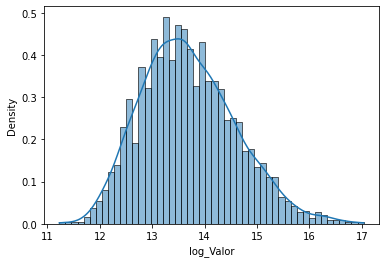

In [70]:
ax = sns.histplot(x = 'log_Valor', data = dataset, bins = 50, stat = 'density', kde = True)

Nice! Our target is now much closer to a Normal distribution!

Now, we are going to perform the same transformation to our features.

Note that the logarithm function is not defined for $x = 0$. However, we have some values of our dataset with a 0 value (when houses are very close to the beach or to a drugstore). Thus, we have to perform a pre-transformation before taking the log. In this case, we will sum $1$ to the entire feature. Note that this does not change the distribution of the feature itself!

In [71]:
dataset['log_Area'] = np.log(dataset.Area)
dataset['log_Dist_Praia'] = np.log(dataset.Dist_Praia + 1)
dataset['log_Dist_Farmacia'] = np.log(dataset.Dist_Farmacia + 1)

dataset.head( )

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


Nice! It seems to have worked out.

Now, let's verify if there is a linear association between the transformed features and the transformed variables:

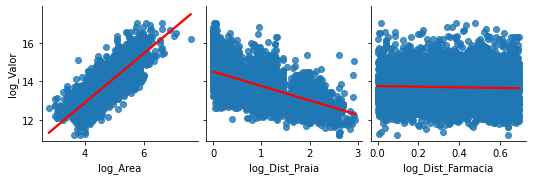

In [72]:
ax = sns.pairplot(dataset, y_vars = ['log_Valor'], x_vars = ['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Nice! Now we can see a more clear linear association between log_Area and log_Dist_Praia with our new transformed target! However, once again, we see no clear linear association between log_Dist_Farmacia and log_Valor. Finally, let's check again the correlation matrix:

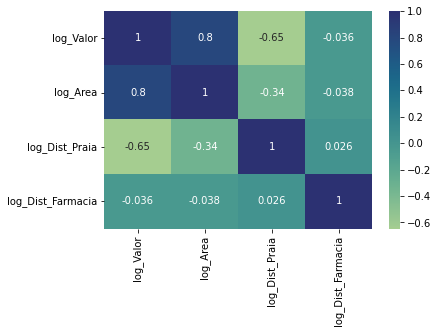

In [73]:
sns.heatmap(dataset[['log_Valor', 'log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']].corr( ), annot = True, cmap = 'crest')

We see that, taking the absolute value, the correlation between log_Area and log_Dist_Praia with log_Valor is much higher!

**Note that we can only transform the target and the features using the logarithm because it is a monotonic function. This means that, if we have a lower value, the logarithm ALWAYS brings a higher value, and if we have a higher value, the logarithm ALWAYS brings a lower value. Functions that do not share this property can not be used to transform a variable.**

# Performing our linear regression

Now that we have transformed our variables, we will now perform our linear regression. Here, we create our model using two different libraries: statsmodels and scikit-learn. 

Before going further into model fitting, we will first define our train-test split.



In [74]:
from sklearn.model_selection import train_test_split

Now, let's define our target and our features:

In [75]:
y = dataset.log_Valor
X = dataset[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

Then, let's perform our train-test split:

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

Now, let's continue to build our regression. Note that we are building a regression from the logarithm of our features and target. Thus, in fact, we are building a log-linear model:

https://en.wikipedia.org/wiki/Log-linear_model

## Statsmodels

Now, let's define a linear regression of our transformed variables. First, we are going to import statsmodels:



In [77]:
import statsmodels.api as sm

Now, we are going to define our model:

In [78]:
y_f = y_train
X_f = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
model_sm = sm.OLS(y_f, X_f, hasconst = True).fit( )

Nice! Now, let's see a summary for our model, with different test-statistics:

In [80]:
print(model_sm.summary( ))

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        12:23:32   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

Now, let's discuss a little about some test-statistics. 

The F-test tests the hypothesis that the model parameters do not represent the target feature well, which means that the model is not good. It tests all parameters at once, and, if *Prob(F-statistic)* is higher than the test significance, we could accept the null hypothesis. However, since *Prob(F-statistic)*$\approx 0.0$, we reject this hypothesis.

However, let's look to each variable by itself. Here, we can see for $P > |t|$, or for the confidence interval. Considering a test significance of 5%, we not the $P > |t|$ is much higher for log_Dist_Farmacia. This means that the feature is not helping the model to predict the target. We can reach the same conclusion by seeing that the confidence interval encompasses the 0 value, which means that the coefficient for this feature could be 0.

Let's try to define the model once again, now taking the Dist_Farmacia out of our model:

In [81]:
X_up = dataset[['log_Area', 'log_Dist_Praia']]

X_train, X_test, y_train, y_test = train_test_split(X_up, y, test_size = 0.2, random_state = 2811)

y_f = y_train
X_f = sm.add_constant(X_train)
model_sm = sm.OLS(y_f, X_f, hasconst = True).fit( )

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now, let's get a summary for our model:

In [82]:
print(model_sm.summary( ))

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        12:23:32   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Note that, even though we now have less explicative parameters, our $R^2$ stayed the same! That shows that the feature log_Dist_Farmacia was not helping to explain our variable.

## Scikit-learn

Now, we are going to fit our model using the scikit-learn package which is very popular for Data Science. First, importing the library:

In [83]:
from sklearn.linear_model import LinearRegression

Now, we instance an object of class LinearRegression:

In [84]:
model_sk = LinearRegression( )

And, finally, we fit the model:

In [89]:
model_sk.fit(X_train, y_train)

AttributeError: ignored

Now, let's show the $R^2$ for the sklearn model:

In [90]:
model_sk.score(X_train, y_train).round(3)

0.805

Nice! We got the same $R^2$ as before. 

Now, let's try to evaluate the $R^2$ for the test data:

In [94]:
model_sk.score(X_test, y_test).round(3)

0.79

We can also see this result using:

In [95]:
from sklearn import metrics

y_pred = model_sk.predict(X_test)

metrics.r2_score(y_test, y_pred).round(3)


0.79

The $R^2$ for the test data was not much different from the $R^2$ from the train data. This is a strong indicative that our model is not overfitted!

Using sklearn, we can then get the prediction of arbitrary values using:

In [100]:
log_area = 5
log_Dist_Praia = 1.28

entry = [[log_area, log_Dist_Praia]]

y_p = model_sk.predict(entry)[0]
y_p

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


13.99732360449768

Note that the prediction gives the transformed output. To get the real prediction, we have to invert the transformation. We can do this using:

In [101]:
np.exp(y_p)

1199389.9428106577

Nice! Note that entries should also be given in logarithm form. So, to make it easier for the user, we can implement the transformation before passing the features to the model:

In [105]:
area = 150
dist_praia = 1

log_area = np.log(area)
log_Dist_Praia = np.log(dist_praia + 1)

entry = [[log_area, log_Dist_Praia]]

y_p = np.exp(model_sk.predict(entry)[0])
y_p

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


1617664.122980751

## Interpreting the coefficients

When fitting our model, we simply defined the parameters of our log-linear functions. Let's take a look at these parameters:

In [106]:
model_sk.intercept_

9.334916409800329

In [107]:
model_sk.coef_

array([ 1.05807818, -0.49061226])

So, we have two types of parameters: the intercept ($\beta_0$) and the angular coefficients ($\beta_1$ and $\beta_2$). Let's understand what these parameters mean.



*   The intercept explicits the average effect in the target if all features are 0.0.
*   The angular coefficient explicits the average effect in the target for a unitary increase in a given variable.



Thus, considering that all features are 0.0 (which is actually impossible, as we can't have null area), the housing price would be, on average:

In [108]:
np.exp(model_sk.intercept_)

11326.681428069842

Now, let's look at the coefficients:

In [109]:
model_sk.coef_

array([ 1.05807818, -0.49061226])

Note that these coefficients were taken from the transformed features, and the explain the transformed target! Thus, they actually express the percentual variation of the target.

The first coefficient is related to the house area, and a unit percent increase changes the price in 1.06%.

The second coefficient is realted to the distance to the beach, and a unit percent increase changes the price in -0.49%.

## Graphical analyses of our model

Finally, let's see some graphical analyses of our model. First, let's plot the association between the true responses and the prediction (for the training data).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


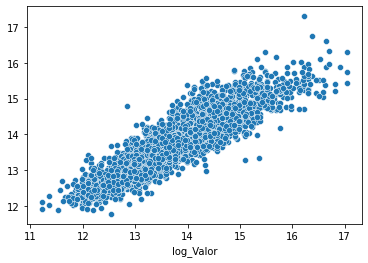

In [111]:
y_pred_train = model_sk.predict(X_train)

ax = sns.scatterplot(y_train, y_pred_train)

Nice! We see that there is a linear association between these values. Note that we can also visualize a similar plot for the test set:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


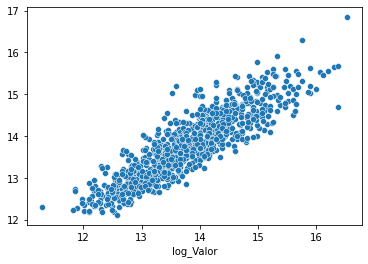

In [113]:
y_pred_test = model_sk.predict(X_test)

ax = sns.scatterplot(y_test, y_pred_test)

Great! Now, let's try to visualize our residuals. The residuals are the difference between the true values and the predicted values. In theory, these residuals should present mean 0 and the variance should be constant (homocedasticity). Also, they should be taken from a Normal distribution.

Let's visualize them:

In [114]:
u = y_train - y_pred_train

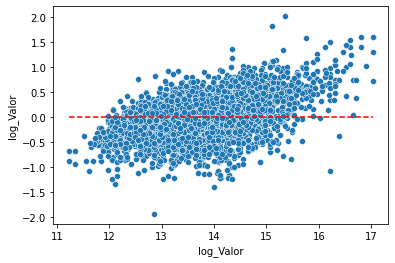

In [115]:
ax = sns.scatterplot(x = y_train, y = u)
ax.hlines(y = 0.0, xmin = y_train.min( ), xmax = y_train.max( ), colors = 'red', linestyles = 'dashed')

We see that our residuals do not show to be homocedastic. Actually, for lower values of log_Valor, our residuals seem to be lower, and for higher values of log_Valor our residuals seem to be higher.

Let's check if their distribution seems like a Normal distribution:

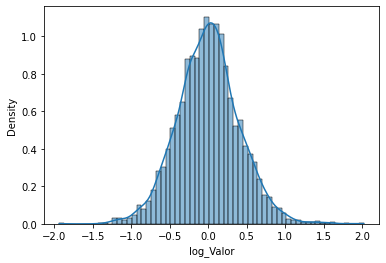

In [117]:
sns.histplot(u, stat = 'density', kde = True)

Our residuals resemble a Normal curve (symmetric bell-shaped curve).